In [177]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

plt.style.use("science")

In [178]:
radial_length = 15 # cm
unit_length = radial_length/1000

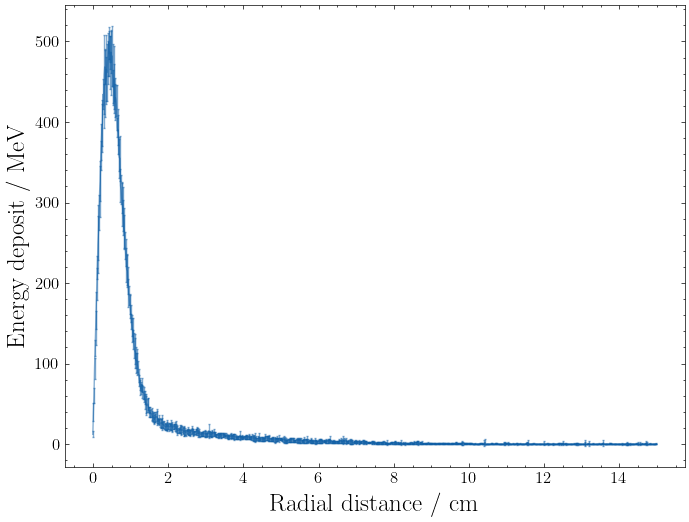

In [185]:
plt.figure(figsize=(8,6))
energy_dist = np.array([np.genfromtxt(f'./part_a/outputs/job{i}.csv', delimiter=',')[:, -1] for i in range(1,10)])

plt.errorbar(
    [unit_length * i for i in range(0,1000)],
    np.mean(energy_dist, axis = 0),
    yerr=np.std(energy_dist, axis = 0),
    capsize=1,
    alpha=.5
    )

plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel("Radial distance / cm", fontsize=18)
plt.ylabel("Energy deposit / MeV", fontsize=18)

plt.savefig("./plots/radial_distribution_no_inset.png", dpi=300)

Part B

----
----
----
----
----
----
----
----
----


(0.0, 20.0)

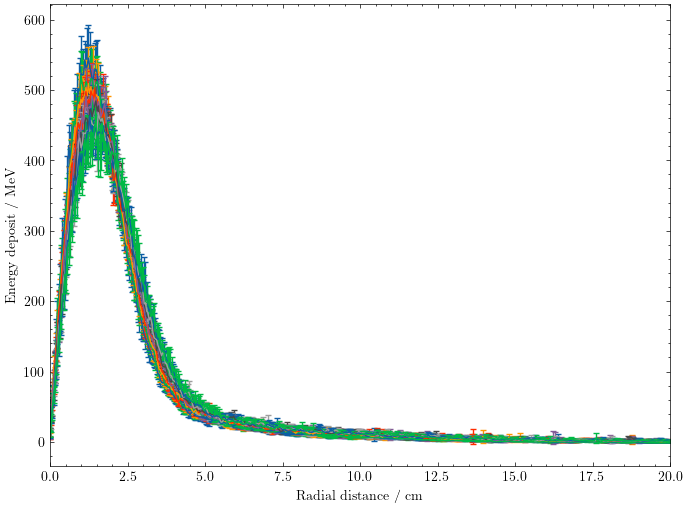

In [193]:
beam_radii = []
beam_radii_unc = []
plt.figure(figsize=(8,6))
for pos in range(1, 19, 2):
    '''energy_dist = np.array([np.genfromtxt(f'./part_b/outputs_pos{str(pos)}/job{i}.csv', delimiter=',')[:, -1] for i in range(1,10)])
    avg_beam = np.mean(energy_dist, axis = 0)
    beam_unc = np.std(energy_dist, axis = 0)

    # Get maximum beam position
    max_pos = np.argmax(avg_beam)

    # Get radius of beam and uncertainty of its width

    print(np.where(avg_beam < avg_beam[max_pos]/np.exp(2))[0][0] * unit_length)
    #print(np.where(avg_beam < (avg_beam[max_pos] + beam_unc[max_pos])/np.exp(2))[0][0] * unit_length)
    #print(np.where(avg_beam < (avg_beam[max_pos] - beam_unc[max_pos])/np.exp(2))[0][0] * unit_length)'''
    energy_dist = np.array([np.genfromtxt(f'./part_b/outputs_pos{pos}/job{i}.csv', delimiter=',')[:, -1] for i in range(1,10)])
    mean_beam = np.mean(energy_dist, axis = 0)
    beam_error = np.std(energy_dist, axis = 0)
    max_pos = np.argmax(mean_beam)
    
    synth_beam_radius = []

    for i in range(10000):
        synth_beam = np.random.normal(mean_beam, beam_error)
        idxs = np.setdiff1d(np.arange(len(synth_beam)), np.where(synth_beam < synth_beam[max_pos]/np.exp(2)))
        synth_beam_radius.append(unit_length*(idxs[-1] - idxs[0]))
    

    plt.errorbar(
        [unit_length * i for i in range(0,1000)],
        np.mean(energy_dist, axis = 0),
        yerr=np.std(energy_dist, axis = 0),
        capsize=2)

    plt.xlabel("Radial distance / cm")
    plt.ylabel("Energy deposit / MeV")
    
    idxs = np.setdiff1d(np.arange(len(mean_beam)), np.where(mean_beam < mean_beam[max_pos]/np.exp(2)))
    beam_radius = unit_length*(idxs[-1] - idxs[0])
    beam_radii.append(np.mean(synth_beam_radius))
    beam_radii_unc.append(np.std(synth_beam_radius))
    print("----")

plt.xlim(0,20)

In [194]:
from scipy.optimize import curve_fit
f = lambda x, m,c: m*x +c

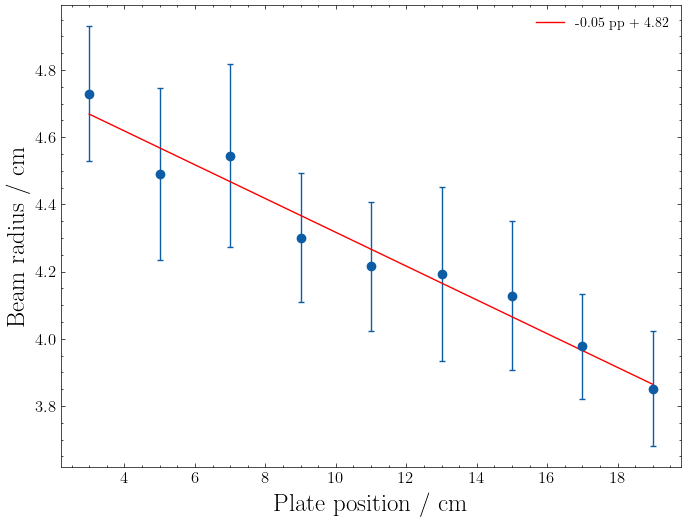

In [196]:
plt.figure(figsize=(8,6))
pos = np.arange(19, 1, -2)

plt.errorbar(
    pos,
    beam_radii,
    yerr=beam_radii_unc,
    ls="none",
    marker="o",
    capsize=2
)
m, c = curve_fit(f, xdata=pos, ydata=beam_radii, sigma=beam_radii_unc)[0]
plt.plot(
    pos,
    m*pos + c,
    label=f"{round(m,3)} pp + {round(c,2)}",
    c="red"
)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel("Plate position / cm", fontsize=18)
plt.ylabel("Beam radius / cm", fontsize=18)

plt.legend()
plt.savefig("./plots/beam_radius_plate_position.png", dpi=300)

Bragg Peak

In [189]:
phantom_length = 40
delta = 1000
unit_length = phantom_length/delta

In [190]:
doses = np.array([np.genfromtxt(f'./bragg_peak/outputs/job{i}.csv', delimiter=',')[:, -1] for i in range(1,11)])

bragg_peaks = np.array([
    unit_length * np.argmax(doses, axis=1)
])

40 - np.mean(bragg_peaks), np.std(bragg_peaks)

(28.112000000000002, 0.029933259094191467)

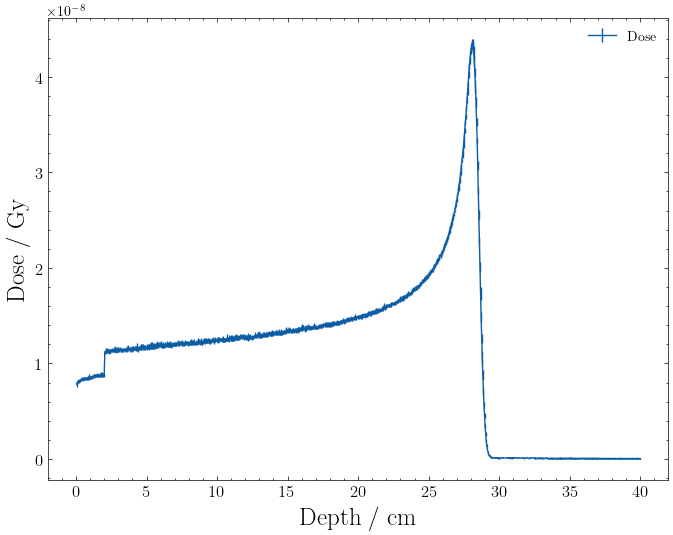

In [192]:
plt.figure(figsize=(8,6))

plt.errorbar(
    40 - np.array([unit_length*i for i in range(1000)]),
    np.mean(doses, axis=0),
    yerr=np.std(doses, axis=0),
    label="Dose"
)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel("Depth / cm", fontsize=18)
plt.ylabel("Dose / Gy", fontsize=18)
plt.legend()

plt.savefig("./plots/Pb_Dose_Depth_ex3_5.png", dpi=300)